# Complementary calculations

# Size of crop

 **Objetivo:** Demostrar que un ROI de 224×224 píxeles (→ 32×32 resized) captura adecuadamente
las nubes que afectarán la irradiancia en Uniandes en los próximos 1-6 horas.

- https://www.star.nesdis.noaa.gov/goesr/documents/ATBDs/Baseline/ATBD_GOES-R_ABI_CMI_KPP_v3.0_July2012.pdf
- https://www.ncei.noaa.gov/products/satellite/goes-r

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Coordenadas Uniandes
LAT, LON = 4.6043, -74.0659

# Parámetros GOES-16
SAT_HEIGHT = 35785.373 # Altura del satélite [m] (GOES-16)
SAT_LON = -75.2        # Longitud del satélite [°]

# Parámetros de nubes
MAX_CLOUD_SPEED = 30.0  # Velocidad máxima de nubes [m/s] (consultar literatura)
PREDICTION_HORIZONS = [1, 2, 3, 4, 5, 6]  # Horas de predicción


# Parámetros de resolución GOES
RESOLUTIONS_KM = {
    1: 1.0,    # 0.47 μm - 1 km
    2: 0.5,    # 0.64 μm - 0.5 km (visible de alta res)
    3: 1.0,    # 0.865 μm - 1 km
    4: 2.0,    # 1.378 μm - 2 km
    5: 1.0,    # 1.61 μm - 1 km
    6: 2.0,    # 2.25 μm - 2 km
    7: 2.0,    # 3.90 μm - 2 km
    8: 2.0,    # 6.19 μm - 2 km
    9: 2.0,    # 6.95 μm - 2 km
    10: 2.0,   # 7.34 μm - 2 km
    11: 2.0,   # 8.5 μm - 2 km
    12: 2.0,   # 9.61 μm - 2 km
    13: 2.0,   # 10.35 μm - 2 km
    14: 2.0,   # 11.2 μm - 2 km
    15: 2.0,   # 12.3 μm - 2 km
    16: 2.0    # 13.3 μm - 2 km
}

CLOUD_CHANNELS = [2, 13, 14, 15] # Visible + IR para nubes


print("Resoluciones reales por canal (km):")
for ch, res in RESOLUTIONS_KM.items():
    print(f"Canal {ch:2d}: {res} km")

resolution_groups = {}
for ch, res in RESOLUTIONS_KM.items():
    if res not in resolution_groups:
        resolution_groups[res] = []
    resolution_groups[res].append(ch)

print("Canales agrupados por resolución:")
for res, channels in sorted(resolution_groups.items()):
    print(f"{res} km: {channels}")

Resoluciones reales por canal (km):
Canal  1: 1.0 km
Canal  2: 0.5 km
Canal  3: 1.0 km
Canal  4: 2.0 km
Canal  5: 1.0 km
Canal  6: 2.0 km
Canal  7: 2.0 km
Canal  8: 2.0 km
Canal  9: 2.0 km
Canal 10: 2.0 km
Canal 11: 2.0 km
Canal 12: 2.0 km
Canal 13: 2.0 km
Canal 14: 2.0 km
Canal 15: 2.0 km
Canal 16: 2.0 km
Canales agrupados por resolución:
0.5 km: [2]
1.0 km: [1, 3, 5]
2.0 km: [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [17]:
ROI_PIXELS = 224

In [18]:
roi_sizes_km = {}
for res in resolution_groups:
    roi_sizes_km[res] = ROI_PIXELS * res

print(f"\nTamaño físico del ROI para cada resolución:")
for res, size in roi_sizes_km.items():
    print(f"{res} km/píxel: {size} km × {size} km")


Tamaño físico del ROI para cada resolución:
1.0 km/píxel: 224.0 km × 224.0 km
0.5 km/píxel: 112.0 km × 112.0 km
2.0 km/píxel: 448.0 km × 448.0 km


In [19]:
print("CÁLCULO DE DISTANCIA MÁXIMA EN ROI RECTANGULAR")
print("="*50)

for res_km in sorted(set(RESOLUTIONS_KM.values())):
    # Tamaño físico del ROI
    roi_width_km = ROI_PIXELS * res_km
    roi_height_km = ROI_PIXELS * res_km
    
    # Distancia MÁXIMA (diagonal) desde el centro hasta cualquier esquina
    max_distance_in_roi = np.sqrt((roi_width_km/2)**2 + (roi_height_km/2)**2)
    
    print(f"\nResolución {res_km} km/píxel:")
    print(f"  • ROI: {roi_width_km:.1f} km × {roi_height_km:.1f} km")
    print(f"  • Distancia máxima en ROI: {max_distance_in_roi:.1f} km")
    print(f"  • (Desde centro hasta esquina)")

CÁLCULO DE DISTANCIA MÁXIMA EN ROI RECTANGULAR

Resolución 0.5 km/píxel:
  • ROI: 112.0 km × 112.0 km
  • Distancia máxima en ROI: 79.2 km
  • (Desde centro hasta esquina)

Resolución 1.0 km/píxel:
  • ROI: 224.0 km × 224.0 km
  • Distancia máxima en ROI: 158.4 km
  • (Desde centro hasta esquina)

Resolución 2.0 km/píxel:
  • ROI: 448.0 km × 448.0 km
  • Distancia máxima en ROI: 316.8 km
  • (Desde centro hasta esquina)


In [20]:
cloud_distances = {}
for hours in PREDICTION_HORIZONS:
    seconds = hours * 3600
    max_distance_km = (MAX_CLOUD_SPEED * seconds) / 1000  # [km]
    cloud_distances[hours] = max_distance_km

print("Distancias máximas de recorrido de nubes:")
for hours, dist in cloud_distances.items():
    print(f"{hours}h: {dist:.1f} km")

# Radio necesario para cada horizonte
max_required_distance = cloud_distances[6]  # Para 6 horas
print(f"\nMáxima distancia requerida (6h): {max_required_distance:.1f} km")

Distancias máximas de recorrido de nubes:
1h: 108.0 km
2h: 216.0 km
3h: 324.0 km
4h: 432.0 km
5h: 540.0 km
6h: 648.0 km

Máxima distancia requerida (6h): 648.0 km


In [25]:
print("\nANÁLISIS COMPARATIVO - ¿EL ROI ACTUAL ES SUFICIENTE?")
print("="*60)

for res_km in sorted(set(RESOLUTIONS_KM.values())):
    # Distancia máxima en ROI actual
    roi_size_km = ROI_PIXELS * res_km
    max_distance_in_roi = np.sqrt((roi_size_km)**2 + (roi_size_km)**2)
    
    # Factor de cobertura
    coverage_ratio = max_distance_in_roi / max_required_distance
    
    # Canales con esta resolución
    channels = [ch for ch, res in RESOLUTIONS_KM.items() if res == res_km]
    cloud_channels = [ch for ch in channels if ch in [2, 13, 14, 15]]  # Canales de nubes
    
    print(f"\nResolución {res_km} km/píxel:")
    print(f"  • ROI: {roi_size_km:.1f} km x {roi_size_km:.1f} km")
    print(f"  • Dist. máxima: {max_distance_in_roi:.1f} km")
    print(f"  • Dist. requerida: {max_required_distance:.1f} km")
    print(f"  • Ratio: {coverage_ratio:.2f}")
    
    if coverage_ratio >= 1.0:
        print(f"SUFICIENTE - Cubre {max_required_distance:.1f} km")
    else:
        deficit = max_required_distance - max_distance_in_roi
        print(f"INSUFICIENTE - Faltan {deficit:.1f} km")
    
    print(f"  • Canales: {channels}")
    if cloud_channels:
        print(f"  • Canales de nubes: {cloud_channels}")


ANÁLISIS COMPARATIVO - ¿EL ROI ACTUAL ES SUFICIENTE?

Resolución 0.5 km/píxel:
  • ROI: 112.0 km x 112.0 km
  • Dist. máxima: 158.4 km
  • Dist. requerida: 648.0 km
  • Ratio: 0.24
INSUFICIENTE - Faltan 489.6 km
  • Canales: [2]
  • Canales de nubes: [2]

Resolución 1.0 km/píxel:
  • ROI: 224.0 km x 224.0 km
  • Dist. máxima: 316.8 km
  • Dist. requerida: 648.0 km
  • Ratio: 0.49
INSUFICIENTE - Faltan 331.2 km
  • Canales: [1, 3, 5]

Resolución 2.0 km/píxel:
  • ROI: 448.0 km x 448.0 km
  • Dist. máxima: 633.6 km
  • Dist. requerida: 648.0 km
  • Ratio: 0.98
INSUFICIENTE - Faltan 14.4 km
  • Canales: [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
  • Canales de nubes: [13, 14, 15]


In [22]:
print("\nCÁLCULO DEL ROI NECESARIO")
print("="*40)

# Queremos que la diagonal ≥ distancia requerida
# diagonal = √( (n*res/2)² + (n*res/2)² ) = √(2*(n*res/2)²) = (n*res)/√2

# Despejando n: n ≥ (distancia_requerida * √2) / res

required_roi_pixels = int(np.ceil((max_required_distance * np.sqrt(2)) / 2))

# Añadir margen de seguridad 20%
SAFETY_MARGIN = 1.2
required_roi_pixels_with_margin = int(np.ceil(required_roi_pixels * SAFETY_MARGIN))

# Asegurar que sea múltiplo de 32 para CNN
required_roi_pixels_final = ((required_roi_pixels_with_margin + 31) // 32) * 32

print(f"ROI mínimo teórico: {required_roi_pixels} px")
print(f"ROI con margen 20%: {required_roi_pixels_with_margin} px")  
print(f"ROI final (múltiplo de 32): {required_roi_pixels_final} px")


CÁLCULO DEL ROI NECESARIO
ROI mínimo teórico: 459 px
ROI con margen 20%: 551 px
ROI final (múltiplo de 32): 576 px


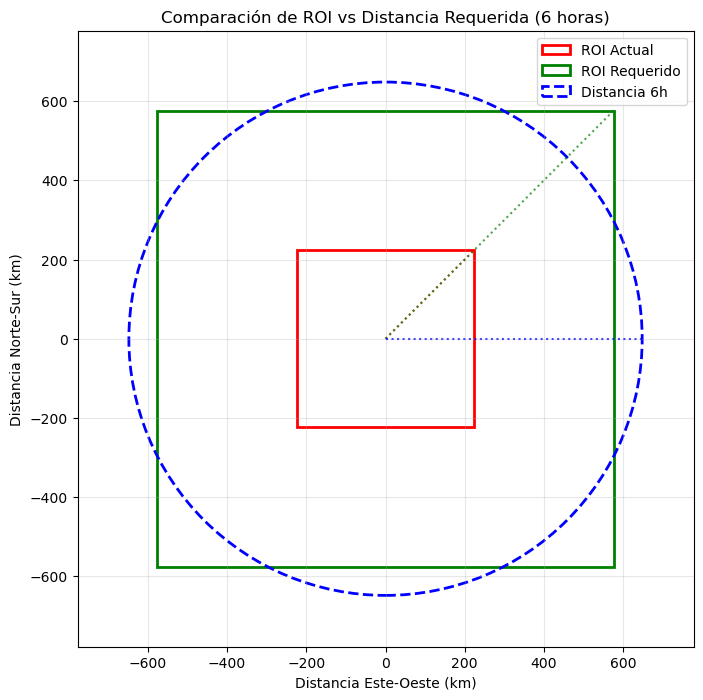

In [24]:
# Visualización del concepto
fig, ax = plt.subplots(figsize=(8, 8))

# ROI actual
current_rect = plt.Rectangle((-roi_size_km/2, -roi_size_km/2), roi_size_km, roi_size_km,
                           fill=False, edgecolor='red', linewidth=2, label='ROI Actual')

# ROI requerido
req_roi_size_km = required_roi_pixels_final * 2
req_rect = plt.Rectangle((-req_roi_size_km/2, -req_roi_size_km/2), req_roi_size_km, req_roi_size_km,
                        fill=False, edgecolor='green', linewidth=2, label='ROI Requerido')

# Círculo de distancia requerida
circle = plt.Circle((0, 0), max_required_distance, fill=False, edgecolor='blue', 
                   linewidth=2, linestyle='--', label='Distancia 6h')

ax.add_patch(current_rect)
ax.add_patch(req_rect)
ax.add_patch(circle)

# Líneas de distancia
ax.plot([0, roi_size_km/2], [0, roi_size_km/2], 'red', linestyle=':', alpha=0.7)
ax.plot([0, req_roi_size_km/2], [0, req_roi_size_km/2], 'green', linestyle=':', alpha=0.7)
ax.plot([0, max_required_distance], [0, 0], 'blue', linestyle=':', alpha=0.7)

ax.set_xlim(-max_required_distance*1.2, max_required_distance*1.2)
ax.set_ylim(-max_required_distance*1.2, max_required_distance*1.2)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_title('Comparación de ROI vs Distancia Requerida (6 horas)')
ax.set_xlabel('Distancia Este-Oeste (km)')
ax.set_ylabel('Distancia Norte-Sur (km)')

plt.show()